In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('retail_sales_dataset.csv')

In [2]:
# Inspect the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [3]:
# Calculate basic statistics
mean_Quantity = data['Quantity'].mean()
# mean = average
median_Quantity = data['Quantity'].median()
# median = middle number
mode_Quantity = data['Quantity'].mode()[0]
# mode = most recurring number
std_Quantity = data['Quantity'].std()
# standard deviation = how much is data scattered

print(f"Mean Quantity: {mean_Quantity}")
print(f"Median Quantity: {median_Quantity}")
print(f"Mode Quantity: {mode_Quantity}")
print(f"Standard Deviation of Quantity: {std_Quantity}")


Mean Quantity: 2.514
Median Quantity: 3.0
Mode Quantity: 4
Standard Deviation of Quantity: 1.1327343409145356


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('retail_sales_dataset.csv')

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Display the DataFrame
print(data.head())


            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-11-24               1     CUST001    Male   34           Beauty   
2023-02-27               2     CUST002  Female   26         Clothing   
2023-01-13               3     CUST003    Male   50      Electronics   
2023-05-21               4     CUST004    Male   37         Clothing   
2023-05-06               5     CUST005    Male   30           Beauty   

            Quantity  Price per Unit  Total Amount  
Date                                                
2023-11-24         3              50           150  
2023-02-27         2             500          1000  
2023-01-13         1              30            30  
2023-05-21         1             500           500  
2023-05-06         2              50           100  


In [5]:
# Resample the data by month and sum the 'Total Amount'
monthly_sales = data['Total Amount'].resample('ME').sum()

# Display the monthly sales
print(monthly_sales)


Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64


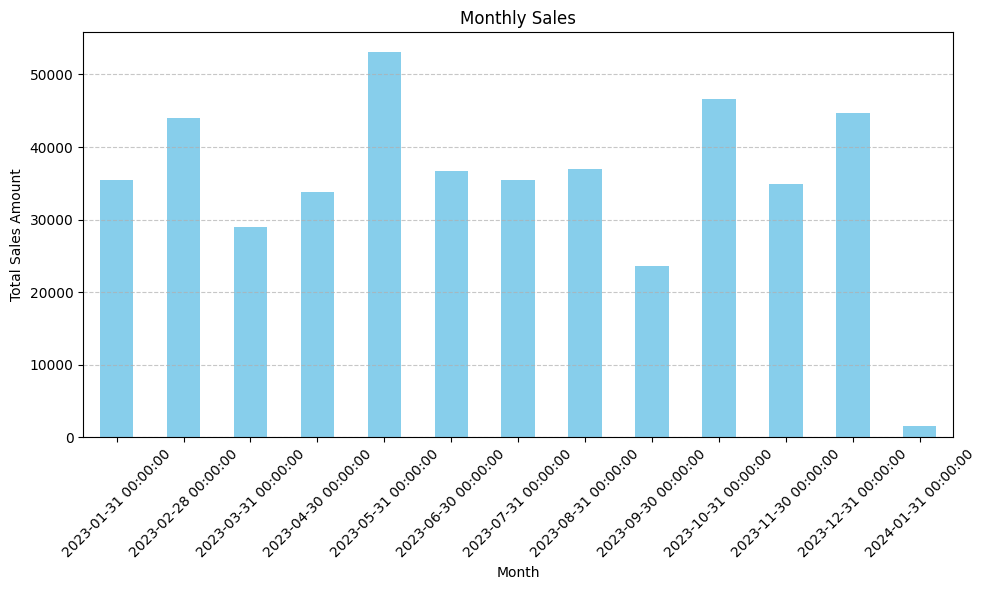

In [6]:
import matplotlib.pyplot as plt

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Date
2023-01-31    195
2023-02-28    214
2023-03-31    194
2023-04-30    214
2023-05-31    259
2023-06-30    197
2023-07-31    176
2023-08-31    227
2023-09-30    170
2023-10-31    252
2023-11-30    205
2023-12-31    207
2024-01-31      4
Freq: ME, Name: Quantity, dtype: int64


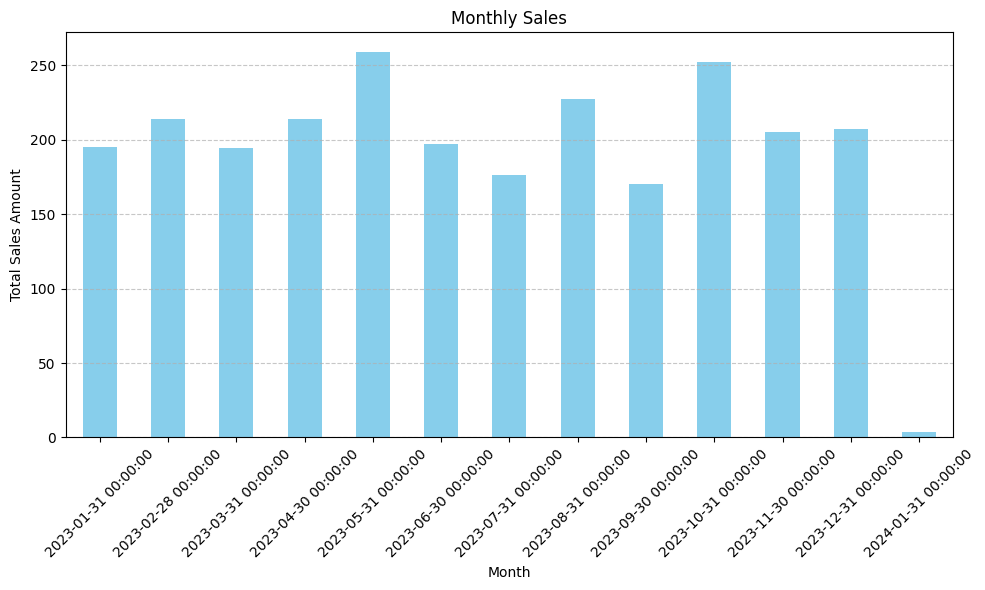

In [7]:
# Resample the data by month and sum the 'Total Amount'
monthly_Quantity = data['Quantity'].resample('ME').sum()

# Display the monthly sales
print(monthly_Quantity)

import matplotlib.pyplot as plt

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_Quantity.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


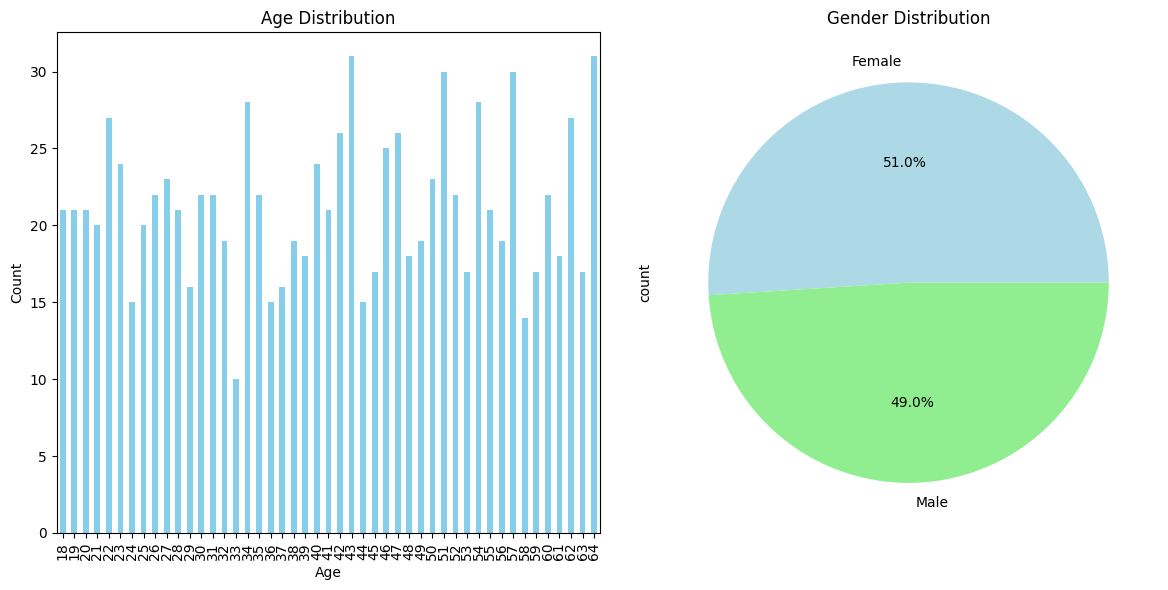

In [8]:
# Age distribution
age_distribution = data['Age'].value_counts().sort_index()
# Gender distribution
gender_distribution = data['Gender'].value_counts()

# Plot age distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot gender distribution
plt.subplot(1, 2, 2)
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


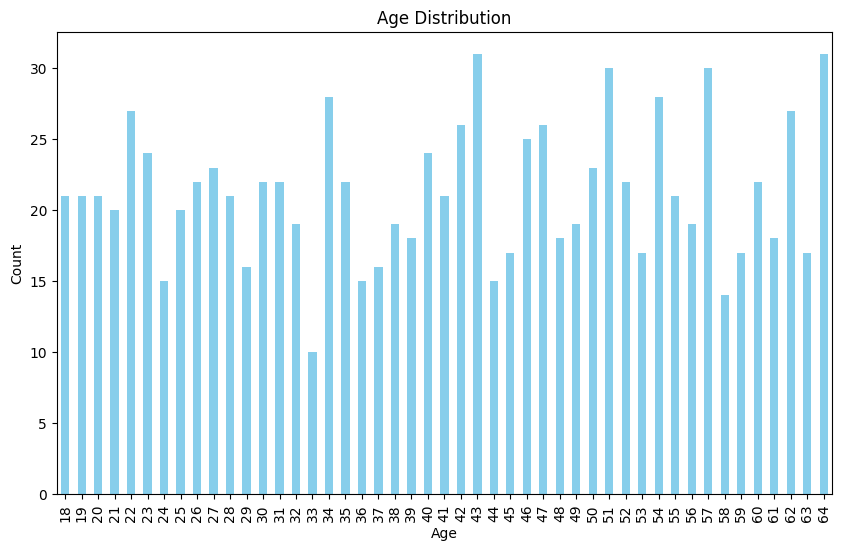

In [9]:
age_distribution = data['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


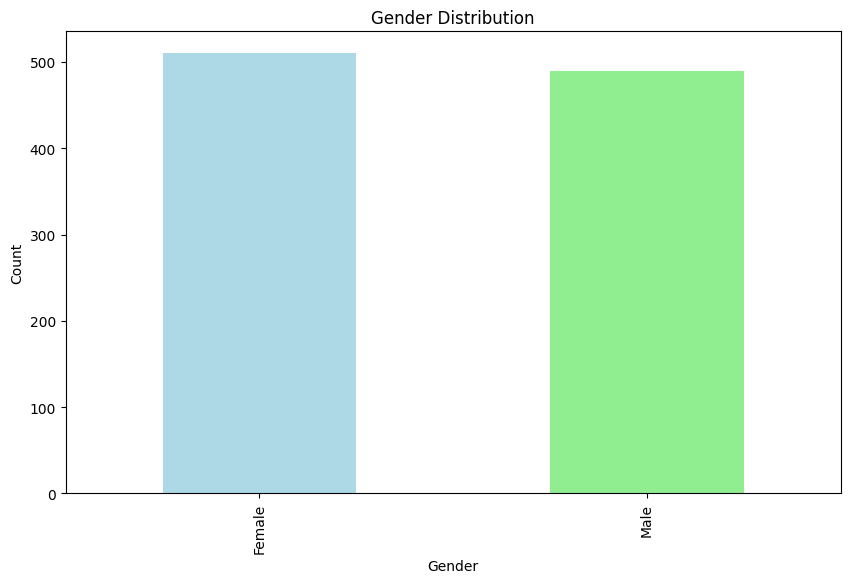

In [10]:
gender_distribution = data['Gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


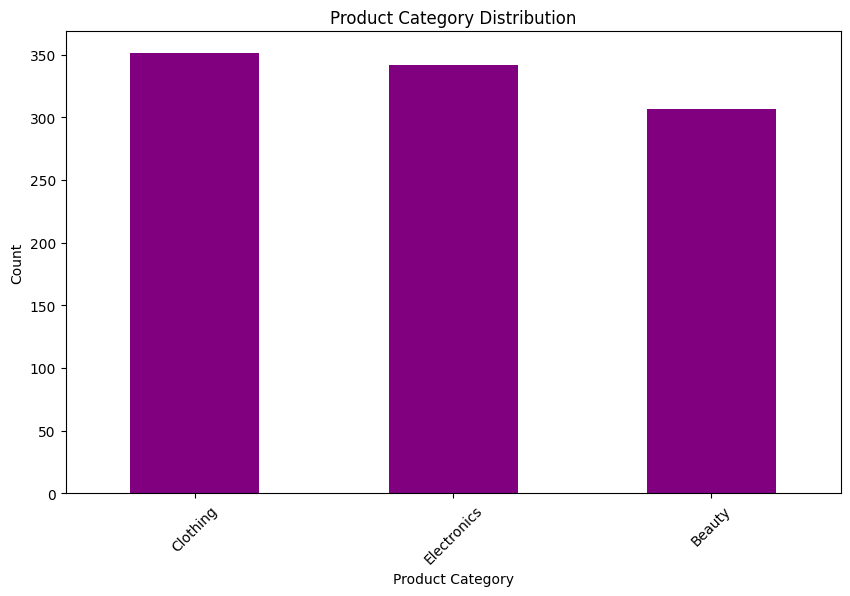

In [11]:
product_category_distribution = data['Product Category'].value_counts()

plt.figure(figsize=(10, 6))
product_category_distribution.plot(kind='bar', color='purple')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

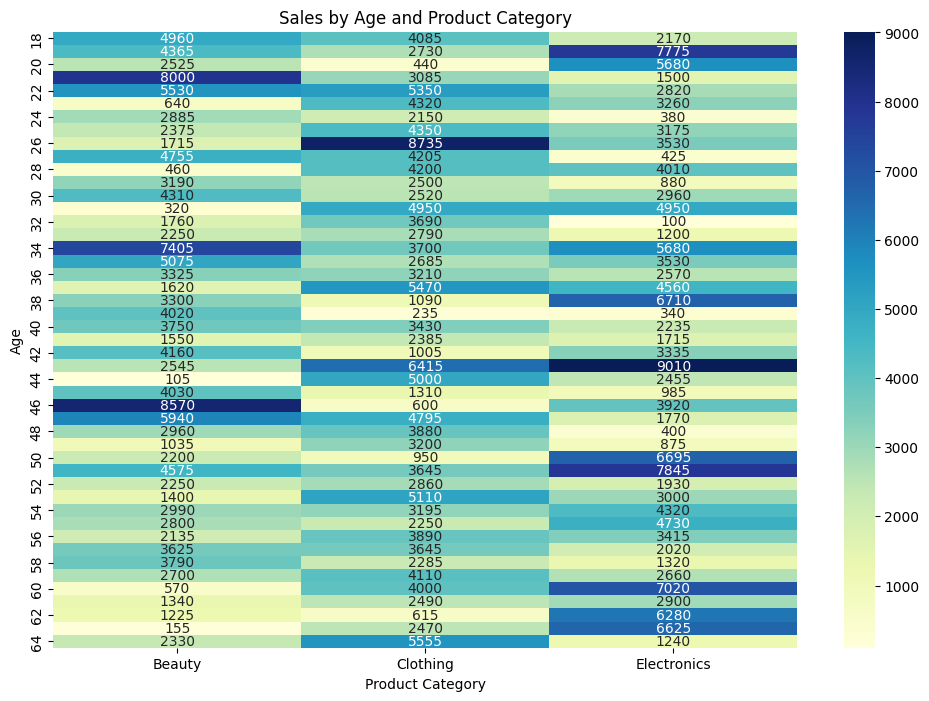

In [ ]:
sales_by_age_category = data.pivot_table(index='Age', columns='Product Category', values='Total Amount', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_age_category, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales by Age and Product Category')
plt.show()
